In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [146]:
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True, precision=2)

In [147]:
charli_albums = pd.read_csv('/Users/tonymoceri/Documents/charli_stats.csv')

In [148]:
charli_albums['streams'].describe()

count         108.00
mean     28303198.52
std      57954326.33
min       1647863.00
25%       6165827.25
50%      10608510.50
75%      18027391.25
max     434724307.00
Name: streams, dtype: float64

In [149]:
charli_albums.head(10)

,song_title,album_title,streams,studio,single,release_date
0,360,brat,46848924,1,1,5/10/24
1,club classics,brat,19753031,1,1,4/3/24
2,sympathy is a knife,brat,13717188,1,0,6/7/24
3,I might say something stypid,brat,7526845,1,0,6/7/24
4,talk talk,brat,14830802,1,0,6/7/24
5,von dutch,brat,44488369,1,1,2/29/24
6,everything is romantic,brat,9485336,1,0,6/7/24
7,rewind,brat,7336747,1,0,6/7/24
8,so I,brat,6574440,1,0,6/7/24
9,"girl, so confusing",brat,7482660,1,0,6/7/24


In [150]:
# Create a new column called "days since release" that is the difference between the current date and the release date
charli_albums['release_date'] = pd.to_datetime(charli_albums['release_date'])
charli_albums['days_since_release'] = (pd.to_datetime('today') - charli_albums['release_date']).dt.days

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/1538658183.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  charli_albums['release_date'] = pd.to_datetime(charli_albums['release_date'])


In [151]:
charli_albums.head(10)

,song_title,album_title,streams,studio,single,release_date,days_since_release
0,360,brat,46848924,1,1,2024-05-10,45
1,club classics,brat,19753031,1,1,2024-04-03,82
2,sympathy is a knife,brat,13717188,1,0,2024-06-07,17
3,I might say something stypid,brat,7526845,1,0,2024-06-07,17
4,talk talk,brat,14830802,1,0,2024-06-07,17
5,von dutch,brat,44488369,1,1,2024-02-29,116
6,everything is romantic,brat,9485336,1,0,2024-06-07,17
7,rewind,brat,7336747,1,0,2024-06-07,17
8,so I,brat,6574440,1,0,2024-06-07,17
9,"girl, so confusing",brat,7482660,1,0,2024-06-07,17


In [152]:
# Create a new column called "streams per day" that is the number of streams divided by the number of days since release
charli_albums['streams_per_day'] = charli_albums['streams'] / charli_albums['days_since_release']

In [153]:
# Which album has the most streams per day?
charli_albums.sort_values('streams_per_day', ascending=False).head(20)

,song_title,album_title,streams,studio,single,release_date,days_since_release,streams_per_day
0,360,brat,46848924,1,1,2024-05-10,45,1041087.20
4,talk talk,brat,14830802,1,0,2024-06-07,17,872400.12
2,sympathy is a knife,brat,13717188,1,0,2024-06-07,17,806893.41
14,365,brat,10894155,1,0,2024-06-07,17,640832.65
107,speed drive,speed drive,225218069,0,1,2023-06-29,361,623872.77
6,everything is romantic,brat,9485336,1,0,2024-06-07,17,557960.94
12,mean girls,brat,7694920,1,0,2024-06-07,17,452642.35
3,I might say something stypid,brat,7526845,1,0,2024-06-07,17,442755.59
10,apple,brat,7501366,1,0,2024-06-07,17,441256.82
9,"girl, so confusing",brat,7482660,1,0,2024-06-07,17,440156.47


In [154]:
charli_albums['album_title'].unique()

array(['brat', 'crash', 'how im feeling now ', 'charli', 'pop 2',
       'number 1 angel', 'sucker', 'true romance', 'superlove',
       'vroom vroom', 'boys', 'welcome to my island', 'speed drive'],
      dtype=object)

In [155]:
brat = charli_albums[charli_albums['album_title'] == 'brat']
crash = charli_albums[charli_albums['album_title'] == 'crash']
how_im_feeling_now = charli_albums[charli_albums['album_title'] == 'how im feeling now ']
pop2 = charli_albums[charli_albums['album_title'] == 'pop 2']
sucker = charli_albums[charli_albums['album_title'] == 'sucker']
true_romance = charli_albums[charli_albums['album_title'] == 'true romance']
charli = charli_albums[charli_albums['album_title'] == 'charli']
number_1_angel = charli_albums[charli_albums['album_title'] == 'number 1 angel']

In [156]:
# Get the number of songs on each album
brat['number_of_songs'] = brat.shape[0]
crash['number_of_songs'] = crash.shape[0]
how_im_feeling_now['number_of_songs'] = how_im_feeling_now.shape[0]
pop2['number_of_songs'] = pop2.shape[0]
sucker['number_of_songs'] = sucker.shape[0]
true_romance['number_of_songs'] = true_romance.shape[0]
charli['number_of_songs'] = charli.shape[0]
number_1_angel['number_of_songs'] = number_1_angel.shape[0]

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/15335983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brat['number_of_songs'] = brat.shape[0]
/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/15335983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash['number_of_songs'] = crash.shape[0]
/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/15335983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

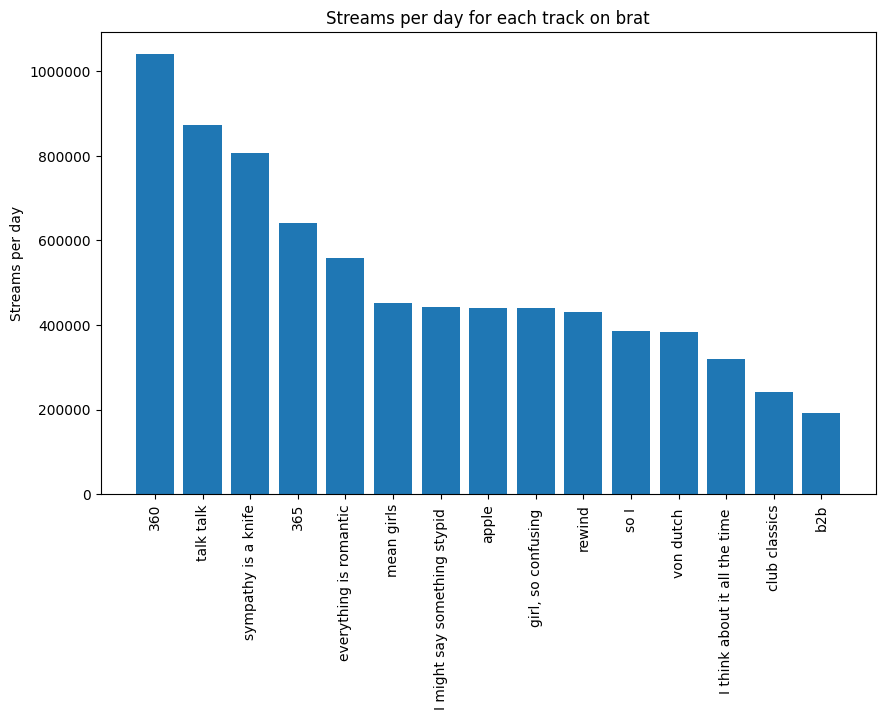

In [158]:
from matplotlib.ticker import FuncFormatter

brat_tracks = brat[['song_title', 'streams_per_day']].copy()
brat_tracks = brat_tracks.sort_values(by='streams_per_day', ascending=False)

# Function to format the tick labels
def round_to_nearest_thousand(x, pos):
    return '%d' % round(x, -3)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(brat_tracks['song_title'], brat_tracks['streams_per_day'])
plt.xticks(rotation=90)
plt.ylabel('Streams per day')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(round_to_nearest_thousand))

plt.title('Streams per day for each track on brat')
plt.show()


We can see that 360 is getting the most attention and averaging one million daily streams since its release! Even b2b, at the lowest streams per day, is still at about 300,000 streams per day

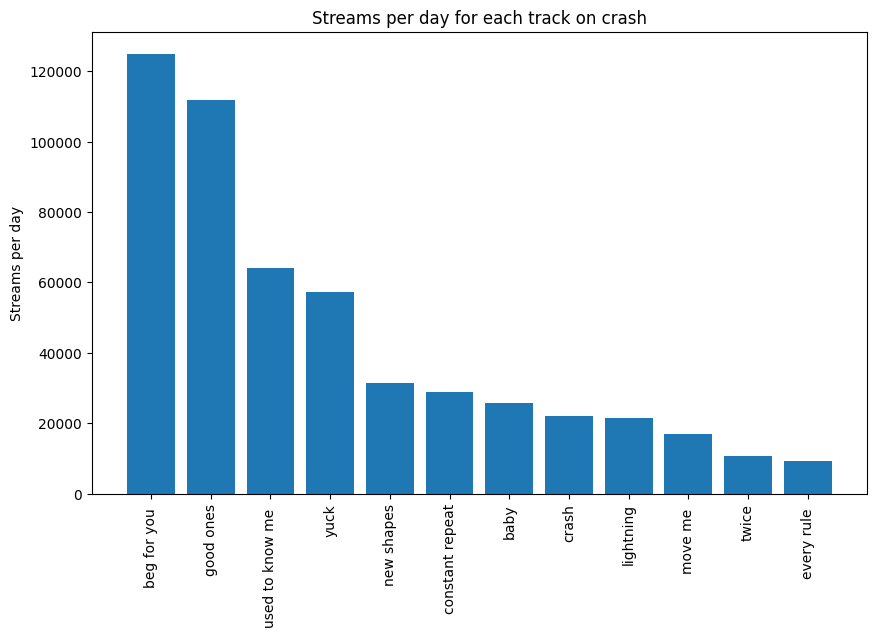

In [159]:
# Let's do the same for crash, how im feeling now, pop 2, sucker, true romance, charli, and number 1 angel
crash_tracks = charli_albums[charli_albums['album_title'] == 'crash']
crash_tracks = crash_tracks.sort_values('streams_per_day', ascending=False)

how_im_feeling_now_tracks = charli_albums[charli_albums['album_title'] == 'how im feeling now ']
how_im_feeling_now_tracks = how_im_feeling_now_tracks.sort_values('streams_per_day', ascending=False)

pop2_tracks = charli_albums[charli_albums['album_title'] == 'pop 2']
pop2_tracks = pop2_tracks.sort_values('streams_per_day', ascending=False)

sucker_tracks = charli_albums[charli_albums['album_title'] == 'sucker']
sucker_tracks = sucker_tracks.sort_values('streams_per_day', ascending=False)

true_romance_tracks = charli_albums[charli_albums['album_title'] == 'true romance']
true_romance_tracks = true_romance_tracks.sort_values('streams_per_day', ascending=False)

charli_tracks = charli_albums[charli_albums['album_title'] == 'charli']
charli_tracks = charli_tracks.sort_values('streams_per_day', ascending=False)

number_1_angel_tracks = charli_albums[charli_albums['album_title'] == 'number 1 angel']
number_1_angel_tracks = number_1_angel_tracks.sort_values('streams_per_day', ascending=False)

# let's graph the streams per day for each track on crash
plt.figure(figsize=(10, 6))
plt.bar(crash_tracks['song_title'], crash_tracks['streams_per_day'])
plt.xticks(rotation=90)
plt.ylabel('Streams per day')
plt.title('Streams per day for each track on crash')
plt.show()

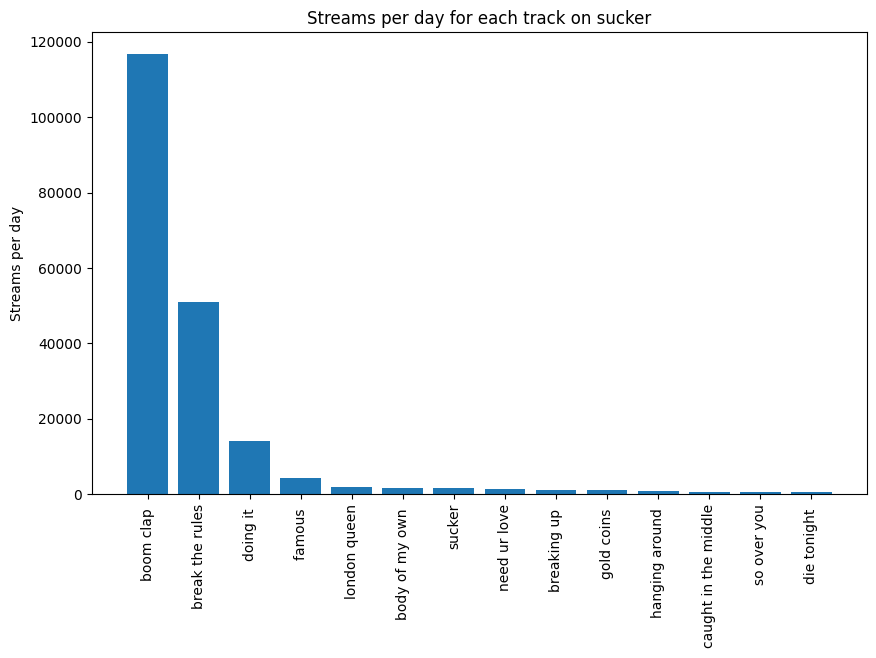

In [160]:
plt.figure(figsize=(10, 6))
plt.bar(sucker_tracks['song_title'], sucker_tracks['streams_per_day'])
plt.xticks(rotation=90)
plt.ylabel('Streams per day')
plt.title('Streams per day for each track on sucker')
plt.show()

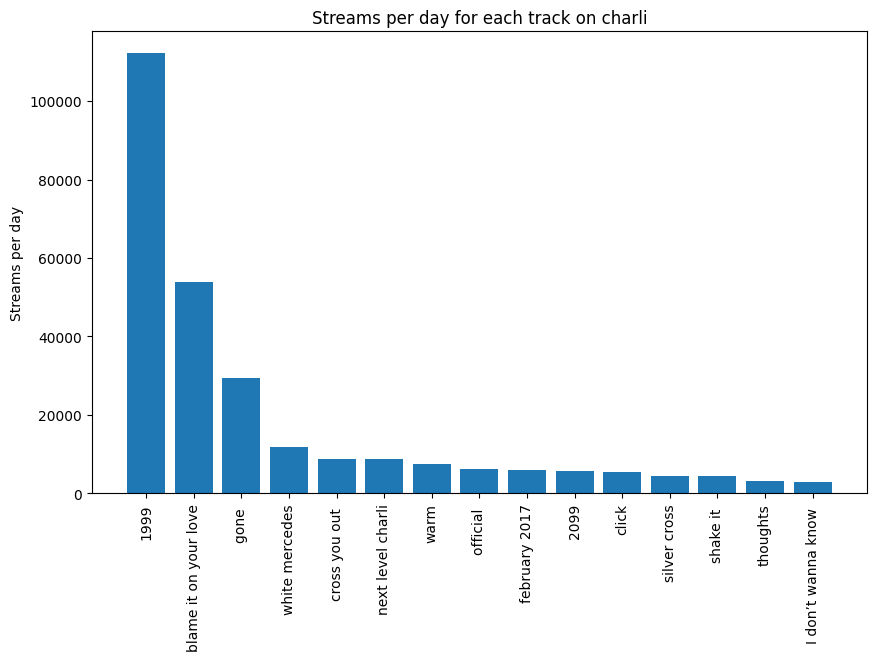

In [161]:
plt.figure(figsize=(10, 6))
plt.bar(charli_tracks['song_title'], charli_tracks['streams_per_day'])
plt.xticks(rotation=90)
plt.ylabel('Streams per day')
plt.title('Streams per day for each track on charli')
plt.show()

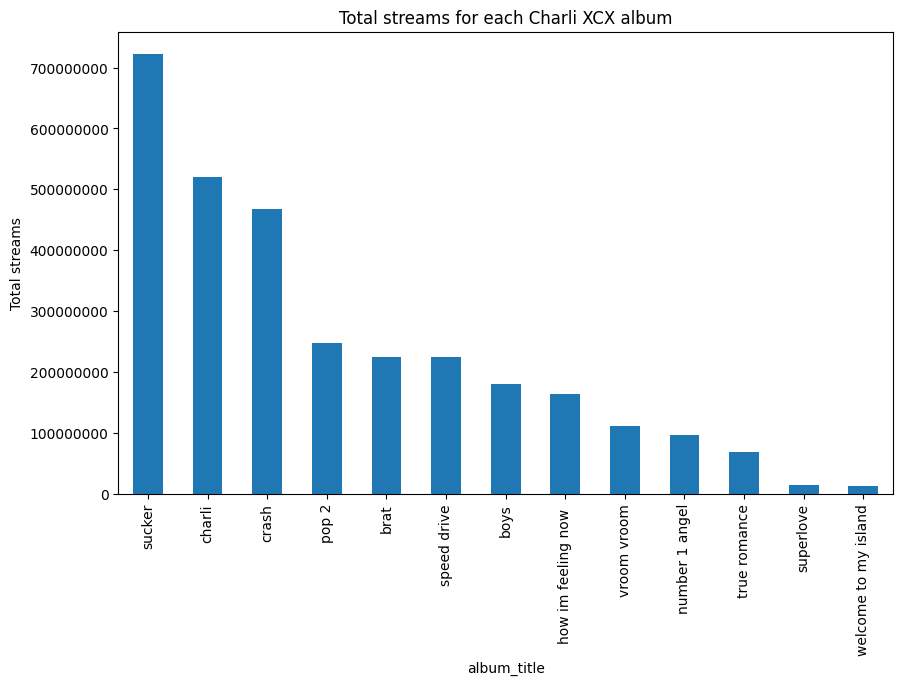

In [162]:
# Your existing code for plotting
charli_albums.groupby('album_title')['streams'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

# Function to format the tick labels to round to the nearest thousand without scientific notation
def round_to_nearest_thousand(x, pos):
    return '%d' % round(x, -3)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(round_to_nearest_thousand))

plt.ylabel('Total streams')
plt.title('Total streams for each Charli XCX album')
plt.show()

When looking at the number of raw streams, Sucker actually takes the cake, followed by Charli, Crash, Pop 2, and then Brat. Brat comes in 5th for total streams when accounting for Charli's entire catalogue. However, to get an indication of what is popular NOW, and where the streaming is condensed, I made a new column "days since release", which is today's date minus the date of release. If the album track was released as a single, I counted the release date of the single. 

So, at this point, we have a measure of the total number of streams per day for each album. 

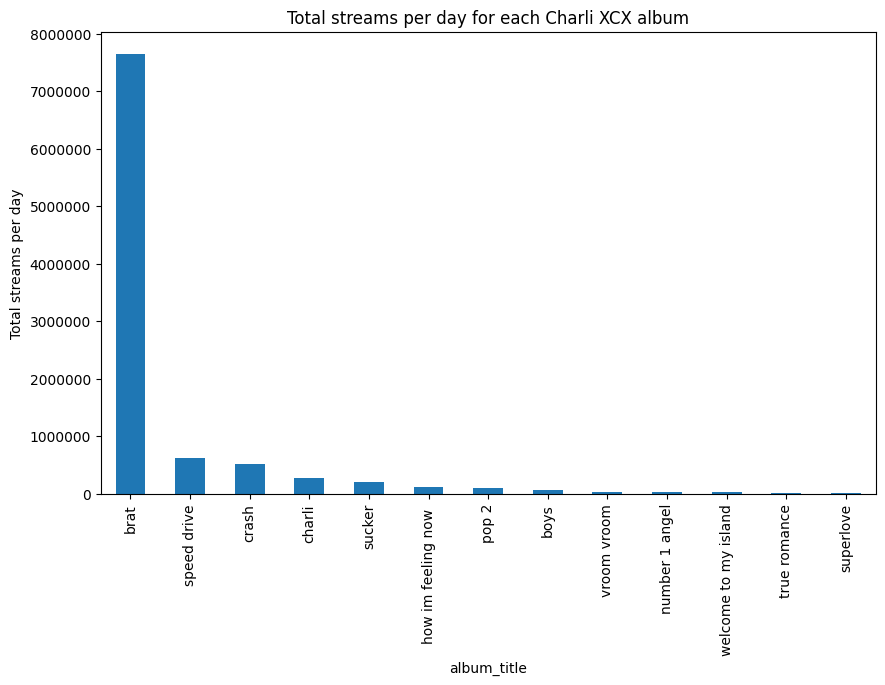

In [163]:
# Function to format the tick labels to round to the nearest thousand without scientific notation
def round_to_nearest_thousand(x, pos):
    return '%d' % round(x, -3)

# Plotting the graph
charli_albums.groupby('album_title')['streams_per_day'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(round_to_nearest_thousand))

plt.ylabel('Total streams per day')
plt.title('Total streams per day for each Charli XCX album')
plt.show()

Now the picture is becoming clear. We can see that Brat has by far the highest number of streams per day compared to the rest of Charli's discography. Finally, to help reduce a bit of the variance and have a bit more of an 'even playing field', I divided this total number of streams per day by the number of tracks on each album to get an average. Finally, we are left with the number of streams per day per track for each of Charli's releases. And again, Brat far outshines every other album so far.

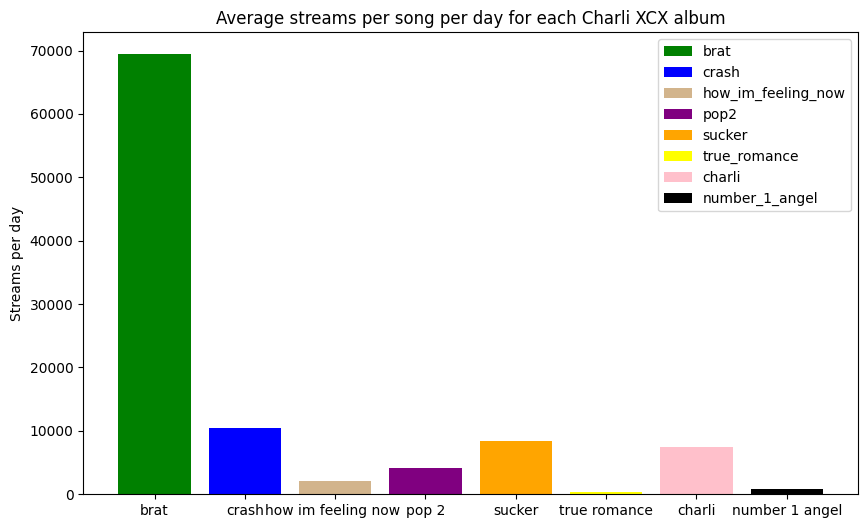

In [164]:
# Now that we have the data aggregated by album, let's plot the streams per day for each album
plt.figure(figsize=(10, 6))
plt.bar(brat['album_title'], (brat['streams_per_day']/15), color='green', label='brat')
plt.bar(crash['album_title'], (crash['streams_per_day']/12), color='blue', label='crash')
plt.bar(how_im_feeling_now['album_title'], (how_im_feeling_now['streams_per_day']/11), color='tan', label='how_im_feeling_now')
plt.bar(pop2['album_title'], (pop2['streams_per_day']/10), color='purple', label='pop2')
plt.bar(sucker['album_title'], (sucker['streams_per_day']/14), color='orange', label='sucker')
plt.bar(true_romance['album_title'], (true_romance['streams_per_day']/13), color='yellow', label='true_romance')
plt.bar(charli['album_title'], (charli['streams_per_day']/15), color='pink', label='charli')
plt.bar(number_1_angel['album_title'], (number_1_angel['streams_per_day']/10), color='black', label='number_1_angel')
plt.ylabel('Streams per day')
plt.title('Average streams per song per day for each Charli XCX album')
plt.legend()
plt.show()

We know that sucker's popularity is primarily driven by Boom Clap, Charli's popularity is driven by her collab with Troye Sivan, 1999, and Crash's popularity is very driven by Beg For You. However, with Crash, the variance between the lead single and the remaining songs is less, likely due to the recency of the release. Beg For You amd Good Ones share the top two spots, following by Yuck and and Used To Know Me.

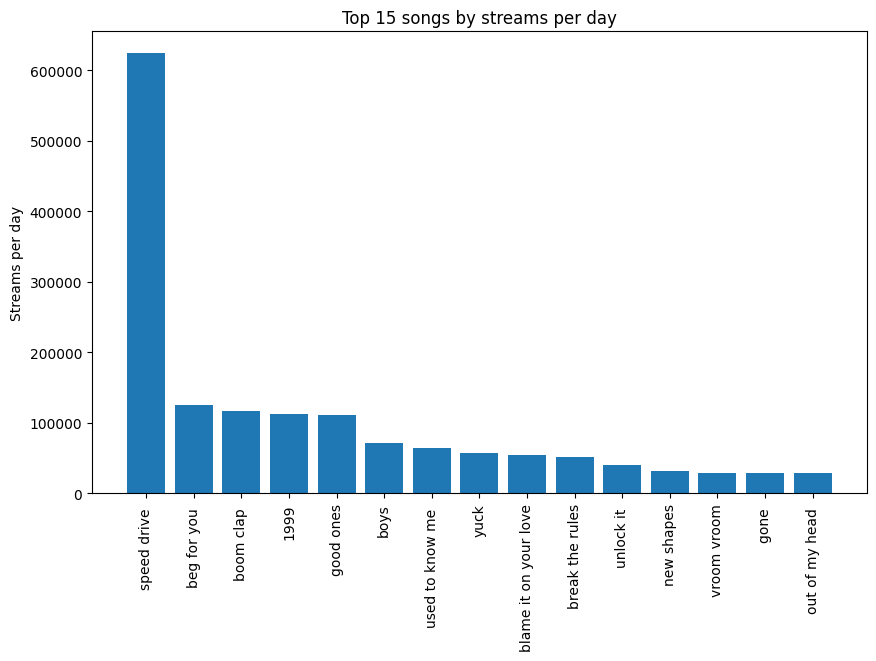

In [177]:
# Not factoring in the song_titles from brat, graph the top 15 songs by streams per day
charli_albums_no_brat = charli_albums[charli_albums['album_title'] != 'brat']
top_15_songs = charli_albums_no_brat.sort_values('streams_per_day', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_15_songs['song_title'], top_15_songs['streams_per_day'])
plt.xticks(rotation=90)
plt.ylabel('Streams per day')
plt.title('Top 15 songs by streams per day')
plt.show()


In [178]:
charli_setlist = pd.read_csv('/Users/tonymoceri/Documents/charli_setlists.csv')

In [179]:
# Add a new column called "supported" that will be a conditional. If the album in the album_title column matches the album in the tour_supporting column, populate the "supported" column with a 1. Otherwise, populate it with a 0.
charli_setlist['supported'] = np.where(charli_setlist['album_title'] == charli_setlist['tour_supporting'], 1, 0)

In [180]:
# There is an issue with the "supported" column for the "girl power" tour. Because that tour supports multiple albums, the conditional we used to populate the "supported" column will not work. Let's fix that.

girl_power_tour = charli_setlist[charli_setlist['tour'] == 'girl power']
girl_power_tour['supported'] = girl_power_tour['tour_supporting'].apply(lambda x: 1 if x in ['sucker', 'true romance'] else 0)
charli_setlist.update(girl_power_tour['supported'])


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/1144538403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  girl_power_tour['supported'] = girl_power_tour['tour_supporting'].apply(lambda x: 1 if x in ['sucker', 'true romance'] else 0)
/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_79734/1144538403.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  charli_setlist.update

In [181]:
# For row 0 of the supported column, manually make the value 1
charli_setlist.loc[0, 'supported'] = 1
charli_setlist.loc[1, 'supported'] = 1
charli_setlist.loc[3, 'supported'] = 1
charli_setlist.loc[5, 'supported'] = 1
charli_setlist.loc[6, 'supported'] = 1
charli_setlist.loc[7, 'supported'] = 1
charli_setlist.loc[8, 'supported'] = 1
charli_setlist.loc[9, 'supported'] = 1
charli_setlist.loc[10, 'supported'] = 1
charli_setlist.loc[12, 'supported'] = 1
charli_setlist.loc[13, 'supported'] = 1
charli_setlist.loc[14, 'supported'] = 1
charli_setlist.loc[15, 'supported'] = 1
charli_setlist.loc[17, 'supported'] = 1

In [182]:
charli_setlist

,song_title,album_title,streams,studio,single,tour,tour_supporting,supported
0,sucker,sucker,5657100.00,1,0,girl power,"[true romance, sucker]",1
1,breaking up,sucker,4060856.00,1,1,girl power,"[true romance, sucker]",1
2,i love it,I love it,878337777.00,0,1,girl power,"[true romance, sucker]",0
3,famous,sucker,15212118.00,1,0,girl power,"[true romance, sucker]",1
4,superlove,superlove,14205960.00,0,1,girl power,"[true romance, sucker]",0
5,black roses,true romance,3287736.00,1,0,girl power,"[true romance, sucker]",1
6,lock you up,true romance,1892295.00,1,0,girl power,"[true romance, sucker]",1
7,caught in the middle,sucker,2446877.00,1,0,girl power,"[true romance, sucker]",1
8,need ur love,sucker,4542901.00,1,0,girl power,"[true romance, sucker]",1
9,stay away,true romance,4347344.00,1,0,girl power,"[true romance, sucker]",1


In [183]:
# Let's get the average value of the "supported" column
charli_setlist['supported'].mean()

0.6949152542372882

In [184]:
# Let's get the value of the supported column for each unique tour
charli_setlist.groupby('tour')['supported'].mean()

tour
charli live   0.71
crash live    0.60
girl power    0.78
Name: supported, dtype: float64

We notice a general trend on the major tours. For each successive tour, the number of songs on the setlist that are supporting her most recently-released albums decreases. The Girl Power tour had the most songs from Sucker and True Romance at about 78%, The Charli Live tour had about 71% of the setlist songs from Charli, and the Crash tour had 60% of the setlist songs from Crash

In [185]:
# How many songs were played for each unique tour?
charli_setlist.groupby('tour')['song_title'].count()

tour
charli live    21
crash live     20
girl power     18
Name: song_title, dtype: int64

In [186]:
# Sort the brat album descending by the number of streams per day
brat.sort_values('streams_per_day', ascending=False)

,song_title,album_title,streams,studio,single,release_date,days_since_release,streams_per_day,number_of_songs
0,360,brat,46848924,1,1,2024-05-10,45,1041087.20,15
4,talk talk,brat,14830802,1,0,2024-06-07,17,872400.12,15
2,sympathy is a knife,brat,13717188,1,0,2024-06-07,17,806893.41,15
14,365,brat,10894155,1,0,2024-06-07,17,640832.65,15
6,everything is romantic,brat,9485336,1,0,2024-06-07,17,557960.94,15
12,mean girls,brat,7694920,1,0,2024-06-07,17,452642.35,15
3,I might say something stypid,brat,7526845,1,0,2024-06-07,17,442755.59,15
10,apple,brat,7501366,1,0,2024-06-07,17,441256.82,15
9,"girl, so confusing",brat,7482660,1,0,2024-06-07,17,440156.47,15
7,rewind,brat,7336747,1,0,2024-06-07,17,431573.35,15


In [187]:
# Sort the brat album descneing by the number of streams
brat.sort_values('streams', ascending=False)

,song_title,album_title,streams,studio,single,release_date,days_since_release,streams_per_day,number_of_songs
0,360,brat,46848924,1,1,2024-05-10,45,1041087.20,15
5,von dutch,brat,44488369,1,1,2024-02-29,116,383520.42,15
1,club classics,brat,19753031,1,1,2024-04-03,82,240890.62,15
11,b2b,brat,15754125,1,1,2024-04-03,82,192123.48,15
4,talk talk,brat,14830802,1,0,2024-06-07,17,872400.12,15
2,sympathy is a knife,brat,13717188,1,0,2024-06-07,17,806893.41,15
14,365,brat,10894155,1,0,2024-06-07,17,640832.65,15
6,everything is romantic,brat,9485336,1,0,2024-06-07,17,557960.94,15
12,mean girls,brat,7694920,1,0,2024-06-07,17,452642.35,15
3,I might say something stypid,brat,7526845,1,0,2024-06-07,17,442755.59,15


In [188]:
# When looking at all tours, which song_titles repeat the most?
charli_setlist['song_title'].value_counts().head(10)

song_title
i love it      2
gone           2
vroom vroom    2
unlock it      2
boys           2
boom clap      2
1999           2
sucker         1
lightning      1
I got it       1
Name: count, dtype: int64

In [190]:
top_15_songs['song_title']

107             speed drive 
19              beg for you 
78                boom clap 
41                      1999
17                 good ones
105                     boys
25          used to know me 
24                      yuck
45     blame it on your love
74           break the rules
60                unlock it 
16                new shapes
101              vroom vroom
39                     gone 
54           out of my head 
Name: song_title, dtype: object

Charli plays about 20 songs, on average, per show. For the Charli Live tour, 15 songs were from the Charli album, and 6 songs were from other albums. For the Crash Live tour, 12 songs were from Crash, and 8 songs were from other albums. BRAT has 15 songs on it, so it is equally likely that she could play the whole album, or at least MOST of the album. If we go just off of stream counts, the songs she is likely to play, in order, are
1. 360
2. Von Dutch
3. Club Classics
4. B2B
5. Talk Talk
6. Sympathy is a Knife
7. 365
8. Everything is Romantic
9. Mean Girls
10. I might Say Something Stupid
11. Apple 
12. Girl, So Confusing
13. Rewind
14. So I
15. I think About It All The Time

Even if she plays the album in full, this is still only 41 minutes, and from viewing setlist.fm, her setlists average about 90 minutes. So, if she were to play BRAT front to back, she would still have about 45 minutes for other songs. Seeing what she has played for the BRAT shows so far, I could guess the AT LEAST the following would be on the setlist:
1. Unlock It - 3:52
2. I Love It - 2:37
3. Track 10 - 5:26
4. Vroom Vroom - 3:13
5. Beg For You - 2:48
6. 1999 - 3:09
7. Welcome To My Island - 3:22
8. Speed Drive - 1:57
9. Party 4 u - 4:56
10. Boys - 2:42

These additional 10 songs, of which she has played all most recently, total about 35 minutes. This would leave about 10 minutes for other songs. This also assumes she would be playing full versions of the longer songs like Track 10 and Party 4 u, which is unlikely. 

The additional 10 minutes, based on the next most popular singles, is likely to be: 
1. Good Ones (Crash)
2. Blame it on your love (Charli)
3. Used to Know Me (Crash)
4. Gone (Charli)
5. New Shapes (Crash)

Now, we have her 15 most popular songs in terms of streams outside of Brat, as well as the songs from previous tours that repeat the most, PLUS songs that she has played recently on Brat promo shows. Again, we know that we probably have about 30-45 minutes worth of music after she plays Brat-era songs, and so we want to first count any songs that overlap with the songs played recently, the top songs in terms of popularity, and songs that repeat the most from previous tours. In this case, that order would go:

1. I Love It
2. Boom Clap
3. Speed Drive
4. Beg For You
5. 1999
6. Boys
7. Unlock It 
8. Vroom Vroom

Next, the songs that she has played more than once across tours and is also in the top 15 most popular 
1. Gone

And finally, remaining songs from the top 15 and some wildcards that were played on the Crash Tour
1. Good Ones
2. Used To Know Me 
3. Yuck
4. Blame it On Your Love
5. Break The Rules
6. New Shapes
7. Out of My Head
8. Party 4 U 
9. Visions

It is much more difficult to predict the actual order. However, from everything Charli has said in interviews about making the show like a rave, and likely not wanting to have many slow songs in the set, I think that "I might say something stupid", "I think about it all the time", and "SO, I" might be excluded from the Brat part of the show. Additionally, the songs she chooses to play from other albums will likely have a more "dance-y" feel to them. So I think, out of the data we aggregated above, it's more likely we would hear songs like Used To Know Me and Good Ones than Yuck, New Shapes, etc. Because the length of Brat is pretty short per song compared to other albums, she will likely have more songs in her set than other tours. I am going to go with 25 songs total. Based on everything that we have discovered from the data, I think the Brat tour setlist will look something like this: 

1. 360
2. Von Dutch
3. Club Classics
4. B2B
5. Talk Talk
6. Sympathy is a Knife
7. 365
8. Everything is Romantic
9. Mean Girls
10. Apple 
11. Girl, So Confusing
12. Rewind
13. Speed Drive
14. Beg For You
15. Unlock it
16. 1999
17. Boys
18. Track 10
19. Good Ones
20. Used to Know Me
21. Guess
22. Spring Breakers
23. Party 4 u
24. Vroom Vroom
25. I Love It 

In [69]:
# Get just the songs that are singles and sort them by the number of times they were played
singles = charli_setlist[charli_setlist['single'] == 1]

In [70]:
singles

,song_title,album_title,streams,studio,single,tour,tour_supporting,supported
1,breaking up,sucker,4060856.0,1,1,girl power,"[true romance, sucker]",1
2,i love it,I love it,878337777.0,0,1,girl power,"[true romance, sucker]",0
4,superlove,superlove,14205960.0,0,1,girl power,"[true romance, sucker]",0
10,you - ha ha ha,true romance,21545614.0,1,1,girl power,"[true romance, sucker]",1
12,london queen,sucker,6955824.0,1,1,girl power,"[true romance, sucker]",1
13,break the rules,sucker,183327358.0,1,1,girl power,"[true romance, sucker]",1
15,gold coins,sucker,3449849.0,1,1,girl power,"[true romance, sucker]",1
17,boom clap,sucker,434724307.0,1,1,girl power,"[true romance, sucker]",1
22,gone,charli,53020195.0,1,1,charli live,charli,1
23,warm,charli,13357508.0,1,1,charli live,charli,1


In [71]:
# Sort the singles by streams
singles.sort_values('streams', ascending=False)

,song_title,album_title,streams,studio,single,tour,tour_supporting,supported
36,i love it,I love it,878337777.0,0,1,charli live,charli,0
2,i love it,I love it,878337777.0,0,1,girl power,"[true romance, sucker]",0
51,boom clap,sucker,434724307.0,1,1,crash live,crash,0
17,boom clap,sucker,434724307.0,1,1,girl power,"[true romance, sucker]",1
48,1999,charli,234275930.0,1,1,crash live,crash,0
38,1999,charli,234275930.0,1,1,charli live,charli,1
13,break the rules,sucker,183327358.0,1,1,girl power,"[true romance, sucker]",1
52,boys,boys,180301922.0,0,1,crash live,crash,0
37,boys,boys,180301922.0,0,1,charli live,charli,0
58,good ones,crash,114749988.0,1,1,crash live,crash,1


I think the highest likelihood of non-BRAT songs, in descending order, would be: 
1. I love it
2. boom clap 
3. 1999 
4. boys
5. vroom vroom
6. good ones
7. beg for you
8. blame it on your love
9. unlock it
10. used to know me
11. gone
12. new shapes
13. baby
14. I got it 
15. Cross you out 
16. Warm
17. February 2017
18. 2099
19. Every Rule